In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics


In [ ]:
file_path = 'SeoulBikeData.csv'  
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [17]:
df_encoded = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

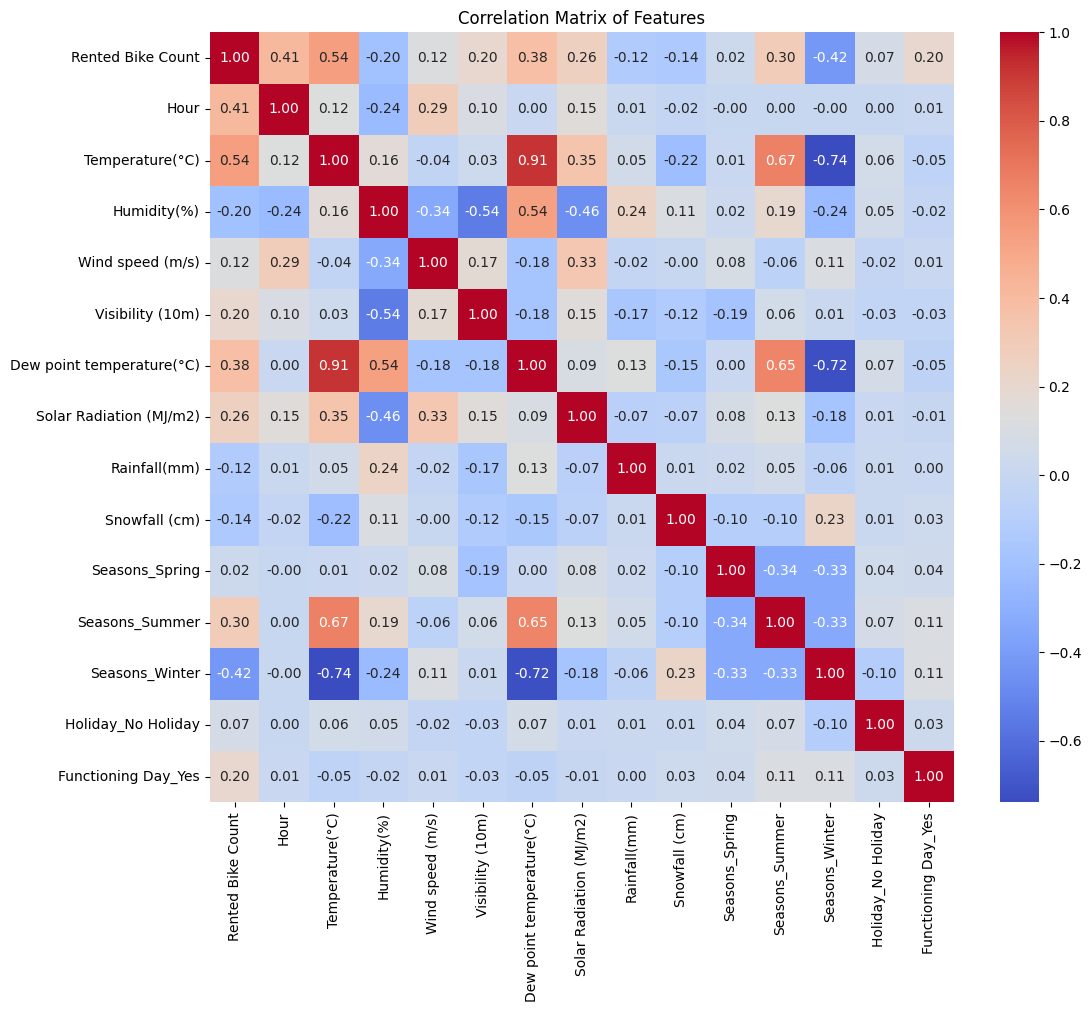

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

### **Insights from the Correlation Matrix:**

- **Rented Bike Count** shows a **moderate positive correlation** with **Temperature (0.54)** and **Hour (0.41)**, indicating that more bikes tend to be rented during warmer periods and certain hours of the day, likely aligning with peak commute times.

- There's a **moderate negative correlation** between **Humidity and Rented Bike Count (-0.20)**, suggesting that higher humidity may discourage bike rentals.

- **Temperature** is **very strongly positively correlated** with **Dew Point Temperature (0.91)** and also has a **strong positive correlation** with **Solar Radiation (0.35)**. This is consistent with expectations, as higher temperatures often coincide with greater solar exposure and elevated dew points.

- **Seasons_Winter** has a **notable negative correlation** with both **Temperature (-0.74)** and **Rented Bike Count (-0.42)**, implying that winter months may see significantly fewer bike rentals due to colder weather conditions.

- **Seasons_Summer** shows a **moderate positive correlation** with **Temperature (0.67)** and **Rented Bike Count (0.30)**, aligning with the expectation that summer encourages outdoor activity like biking.


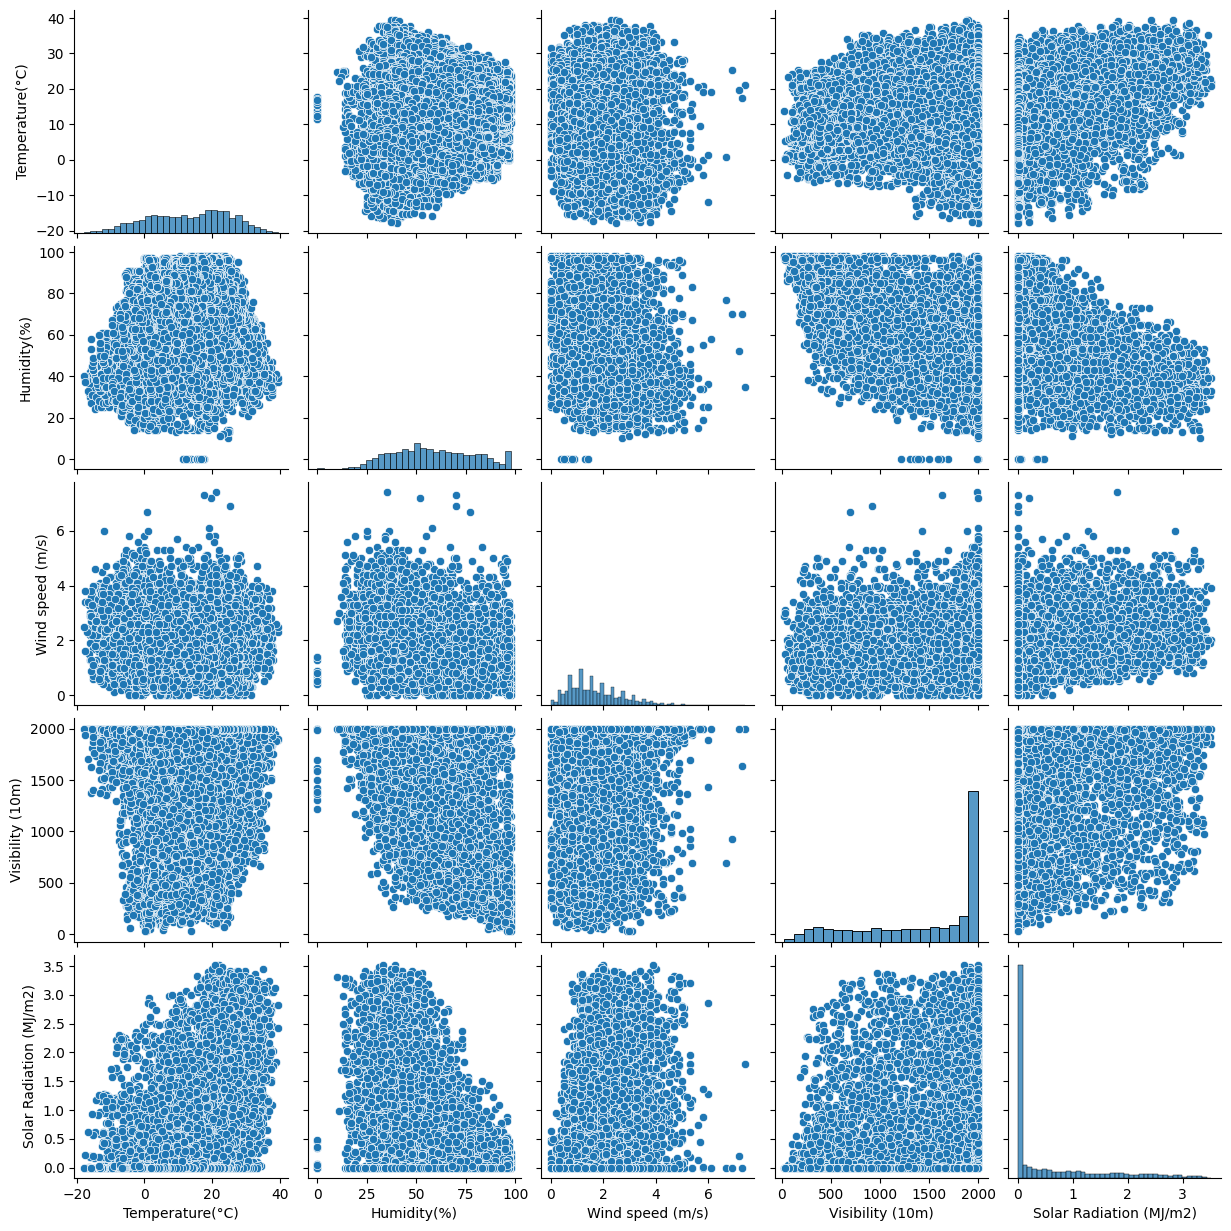

In [19]:
features_to_plot = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)']
sns.pairplot(df[features_to_plot])
plt.show()

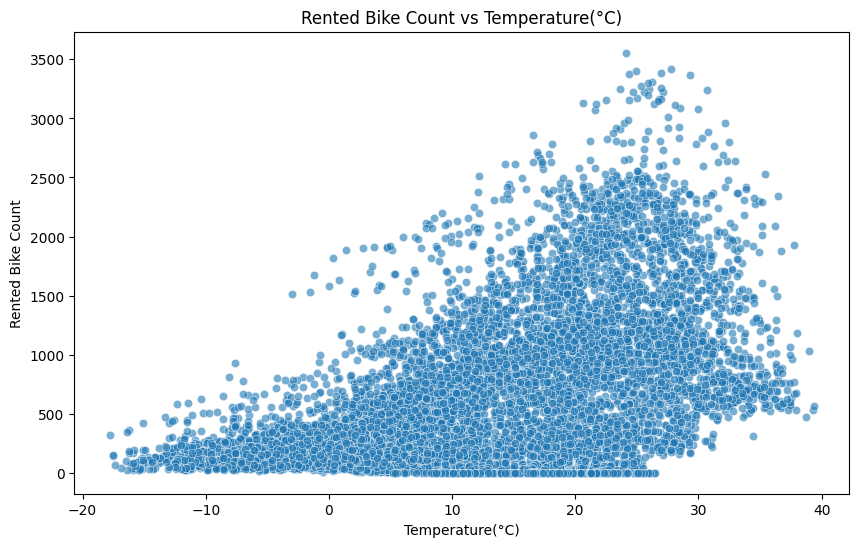

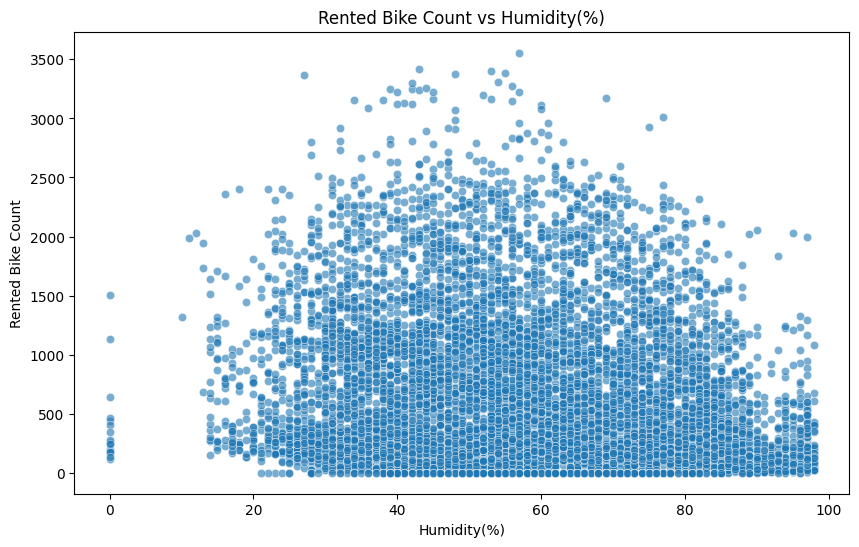

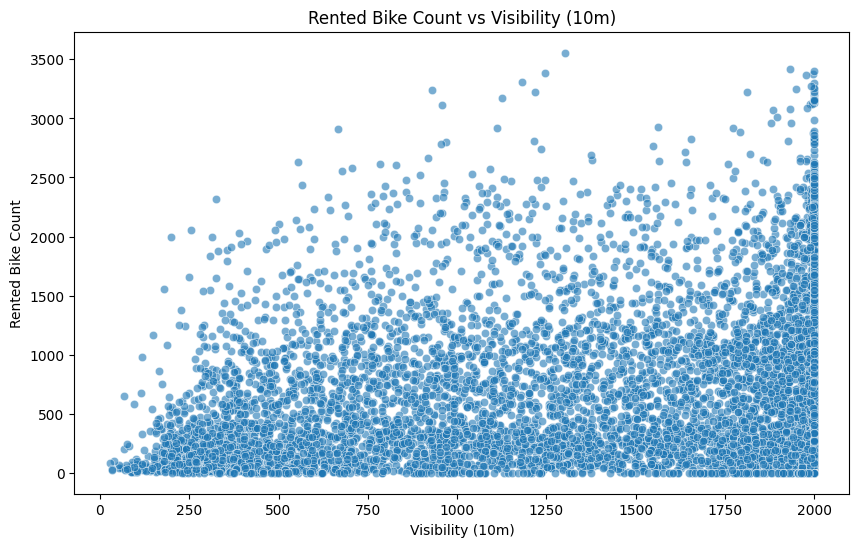

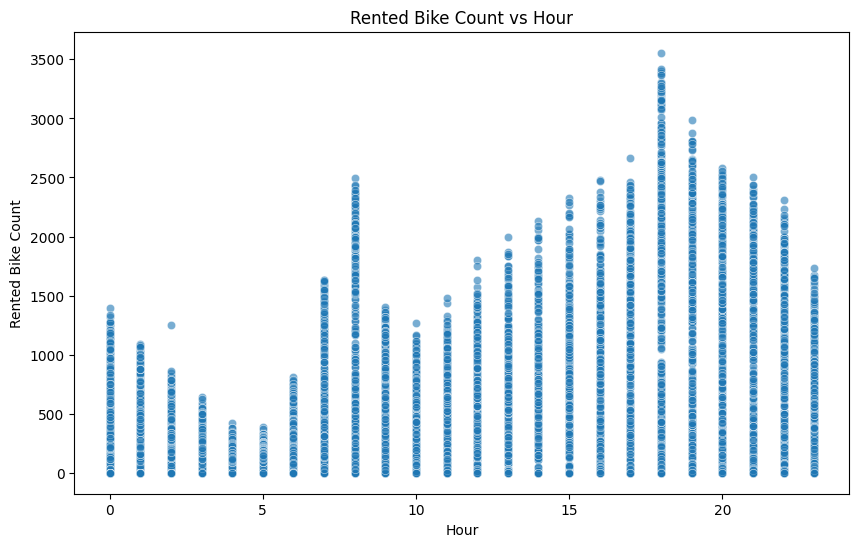

In [20]:
features_of_interest = ['Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Hour']
for feature in features_of_interest:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['Rented Bike Count'], alpha=0.6)
    plt.title(f'Rented Bike Count vs {feature}')
    plt.ylabel('Rented Bike Count')
    plt.xlabel(feature)
    plt.show()

### **Scatter Plot Analysis: Factors Influencing Rented Bike Count**

- **Temperature (°C):**  
  There is a clear upward trend showing that the number of rented bikes increases with rising temperature up to around 25°C. This aligns with expectations, as pleasant, warm weather encourages outdoor activities like cycling. However, beyond this point, the rentals plateau or slightly decline, possibly due to discomfort from excessive heat.

- **Humidity (%):**  
  The densest distribution of rentals occurs at mid-level humidity (around 40–60%), indicating a "comfort zone" for outdoor activity. As humidity approaches 100%, rental activity noticeably drops. This could be due to discomfort or potential rain, both of which would discourage bike use.

- **Visibility (10m):**  
  Higher visibility appears to be associated with greater bike rentals. On clearer days (visibility > 1000m), there is a denser cluster of higher rental counts, suggesting that better weather and clearer skies encourage biking.

- **Hour of the Day:**  
  Rentals follow a clear time-of-day pattern:
  - **Morning and Evening Peaks:** Significant spikes are seen around 8 AM and 5–6 PM, aligning with typical commuting times.
  - **Midday Uptick:** A moderate rise in rentals is observed around noon, likely due to lunch breaks or casual daytime use.
  - **Low Activity at Night:** Rentals drop substantially during late-night and early-morning hours when fewer people are active.



These visual patterns reinforce the insights gained from the correlation matrix, highlighting that bike demand is influenced by a mix of **weather-related factors** (temperature, humidity, visibility) and **time-based human behavior** (hour of day).


In [39]:
X_full = df_encoded.drop(['Rented Bike Count', 'Date'], axis=1, errors='ignore')
y_full = df_encoded['Rented Bike Count']
X_train_full, X_temp_full, y_train_full, y_temp_full = train_test_split(X_full, y_full, test_size=0.4, random_state=42)
X_val_full, X_test_full, y_val_full, y_test_full = train_test_split(X_temp_full, y_temp_full, test_size=0.5, random_state=42)

In [40]:

X_foi = df_encoded[features_of_interest +
                   df_encoded.columns[df_encoded.columns.str.startswith('Seasons_')].tolist() +
                   df_encoded.columns[df_encoded.columns.str.startswith('Holiday_')].tolist() +
                   df_encoded.columns[df_encoded.columns.str.startswith('Functioning Day_')].tolist()]
y_foi = df_encoded['Rented Bike Count']
X_train_foi, X_temp_foi, y_train_foi, y_temp_foi = train_test_split(X_foi, y_foi, test_size=0.4, random_state=42)
X_val_foi, X_test_foi, y_val_foi, y_test_foi = train_test_split(X_temp_foi, y_temp_foi, test_size=0.5, random_state=42)

In [43]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
def train_evaluate_model(X_train, X_test, y_train, y_test):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)

    # Random Forest model
    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train, y_train)
    y_pred_rf = rf_reg.predict(X_test)

    # Evaluation
    lin_reg_r2 = metrics.r2_score(y_test, y_pred_lin)
    lin_reg_rmse = mean_squared_error(y_test, y_pred_lin)

    rf_reg_r2 = metrics.r2_score(y_test, y_pred_rf)
    rf_reg_rmse = metrics.mean_squared_error(y_test, y_pred_rf)

    return lin_reg_r2, lin_reg_rmse, rf_reg_r2, rf_reg_rmse

In [45]:
results_full = train_evaluate_model(X_train_full, X_test_full, y_train_full, y_test_full)
print("Full dataset - Linear Regression - Test R2 Score:", results_full[0])
print("Full dataset - Linear Regression - Test RMSE:", results_full[1])
print("Full dataset - Random Forest - Best Test R2 Score:", results_full[2])
print("Full dataset - Random Forest - Best Test RMSE:", results_full[3])


Full dataset - Linear Regression - Test R2 Score: 0.5113706431359683
Full dataset - Linear Regression - Test RMSE: 197642.64267811013
Full dataset - Random Forest - Best Test R2 Score: 0.8442080220760574
Full dataset - Random Forest - Best Test RMSE: 63015.32601837899


In [30]:
results_foi = train_evaluate_model(X_train_foi, X_test_foi, y_train_foi, y_test_foi)
print("Features of Interest - Linear Regression - Test R2 Score:", results_foi[0])
print("Features of Interest - Linear Regression - Test RMSE:", results_foi[1])
print("Features of Interest - Random Forest - Best Test R2 Score:", results_foi[2])
print("Features of Interest - Random Forest - Best Test RMSE:", results_foi[3])

Features of Interest - Linear Regression - Test R2 Score: 0.49561342920527973
Features of Interest - Linear Regression - Test RMSE: 204016.17991805988
Features of Interest - Random Forest - Best Test R2 Score: 0.827201767149957
Features of Interest - Random Forest - Best Test RMSE: 69894.08006464358


### Analysis:

Random Forest Regression outperformed Linear Regression across both the full dataset (using all available features) and the subset with only selected features of interest. This is evident from its higher R² scores and lower RMSE values in both scenarios. The superior performance of Random Forest highlights its strength in modeling complex, non-linear relationships, which are likely present in the bike rental data. As an ensemble method, Random Forest combines multiple decision trees, making it more resilient to outliers and capable of capturing interactions between features without explicitly modeling them.

In contrast, Linear Regression assumes a linear relationship between inputs and outputs, which may not hold true in real-world scenarios like bike rentals where various factors interact in non-linear ways. As a result, its performance was weaker, especially in terms of RMSE, and it is more susceptible to outliers that can skew predictions.

When only the features of interest were used, both models performed slightly worse compared to using the full dataset. This suggests that the excluded features in the full dataset may hold additional predictive power that enhances model accuracy. However, the drop in performance wasn’t drastic, indicating that the selected features still capture a substantial portion of the predictive signal and carry meaningful weight.

#### For the full dataset:
- **Random Forest** achieved an **R² score of ~0.844**, explaining about **84.4% of the variance** in bike rental counts. This high score reinforces Random Forest’s effectiveness at utilizing a wide set of features and their interactions.
- It also achieved a lower **RMSE of ~63,015**, suggesting its predictions are more closely aligned with actual rental counts than those from Linear Regression.

#### With the features of interest:
- **Random Forest** still performed strongly, achieving an **R² of ~0.827** and an **RMSE of ~69,894**, which, while slightly less accurate than with the full dataset, still indicates good predictive capability.

These findings support the value of incorporating a broad range of features when predicting real-world outcomes like bike rentals, but also affirm that carefully selected features can still drive strong model performance.
